<a href="https://colab.research.google.com/github/jcdevaney/TOSS2025/blob/main/colabNotebooks/toss2025_notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load files from Git repository

In [ ]:
!git clone https://github.com/jcdevaney/toss2025.git

Cloning into 'toss2025'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 91 (delta 8), reused 9 (delta 4), pack-reused 73 (from 2)
Receiving objects: 100% (91/91), 57.29 MiB | 19.01 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Updating files: 100% (62/62), done.


# Load libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa

# Functions to plot a spectrogram with an overlay of imported data

In [ ]:
def overlayPlot(audiofile,dataDF,title):
    # open audio file
    y, fs = librosa.load(audiofile)

    # run the short time fourier transform
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Create a figure and primary axes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Display the spectrogram on the left y-axis
    librosa.display.specshow(D, sr=fs, x_axis='time', y_axis='log')
    ax1.set_ylabel('Spectrogram Power (dB)', color='tab:red')

    # Create a secondary y-axis and plot the time series on it
    ax2 = ax1.twinx()
    ax2.plot(dataDF['Time'], dataDF['Data'], label='Time Series', color='tab:blue')
    ax2.set_ylabel('Energy', color='tab:blue')

    # Add a colorbar for the spectrogram
    cbar = plt.colorbar(format='%+2.0f dB', ax=ax1)
    cbar.set_label('Power (dB)')

    plt.title(title)
    plt.show()

def plotTimePoints(D,sr,times):

  # plot spectrogram
  librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='mel')

  # Let's draw transparent lines over the beat frames
  plt.vlines(times,
            1, 0.5 * sr,
            colors='w', linestyles='-', linewidth=2, alpha=0.5)

  plt.axis('tight')

  plt.colorbar(format='%+02.0f dB')

  plt.tight_layout()


def plotF0(D,data,plotTitle):

  # plot spectrogram
  fig, ax = plt.subplots()
  img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
  ax.set(title=plotTitle)
  fig.colorbar(img, ax=ax, format="%+2.f dB")

  # overlay data on spectrogram
  ax.plot(data['Time'], data['Data'], label='f0', color='cyan', linewidth=3)
  ax.legend(loc='upper right')

# Fundamental Frequency

## Plot F0 data imported from Sonic Visualiser

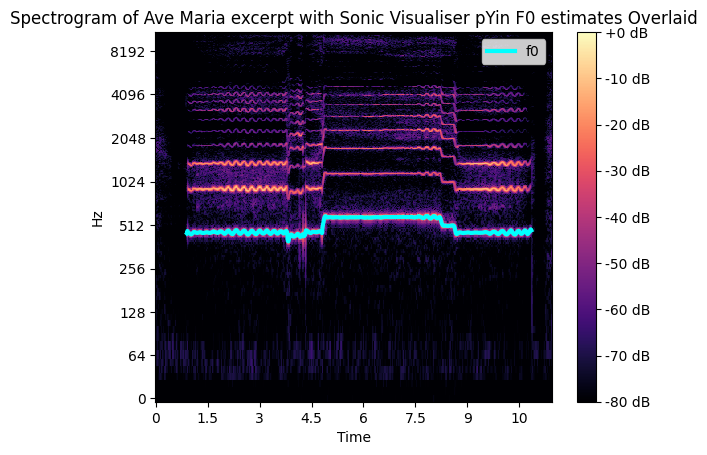

In [ ]:
# load onset estimates from Sonic Visualiser's pYIN plugin
audiofileEX = '/content/toss2025/audio/avm.wav'
y, fs = librosa.load(audiofileEX)
avmF0sv = pd.read_csv('/content/toss2025/audio/sonicVisualiser/avm_pYinF0.csv',names=['Time','Data'])

# generate spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# plot estimates
plotF0(D,avmF0sv,'Spectrogram of Ave Maria excerpt with Sonic Visualiser pYin F0 estimates Overlaid')

## Plot F0 data from pyin in librosa

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The win_length parameter has been deprecated in version 0.11.0 and has no effect. It will be removed in version 1.0.0.
  exec(code_obj, self.user_global_ns, self.user_ns)


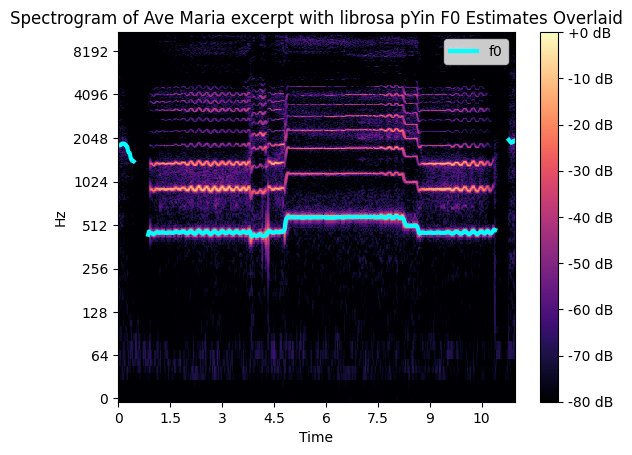

In [ ]:
# https://librosa.org/doc/main/generated/librosa.pyin.html

# estiamte F0 with librosa
f0, voiced_flag, voiced_probs = librosa.pyin(y,sr=fs, frame_length=2048, win_length=256,
                                             fmin=librosa.note_to_hz('C2'),
                                             fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0)
avmF0librosa = pd.DataFrame()
avmF0librosa['Time'] = times
avmF0librosa['Data'] = f0

# plot estimates
plotF0(D,avmF0librosa,'Spectrogram of Ave Maria excerpt with librosa pYin F0 Estimates Overlaid')

# Onset Estimation

## Plot Onset Estimates from **Sonic Visualiser**

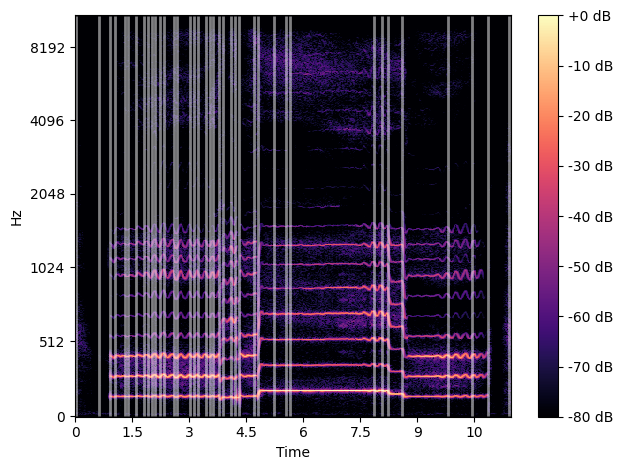

In [ ]:
# load onset estimates from Sonic Visualiser's Queen Mary VAMP plugin
avmQMULonsets = pd.read_csv('/content/toss2025/audio/sonicVisualiser/avm_qmulOnsets.csv',names=['Time'])

# plot onset estimates
plotTimePoints(D,fs,avmQMULonsets['Time'])

## Plot onset estimates from **librosa**

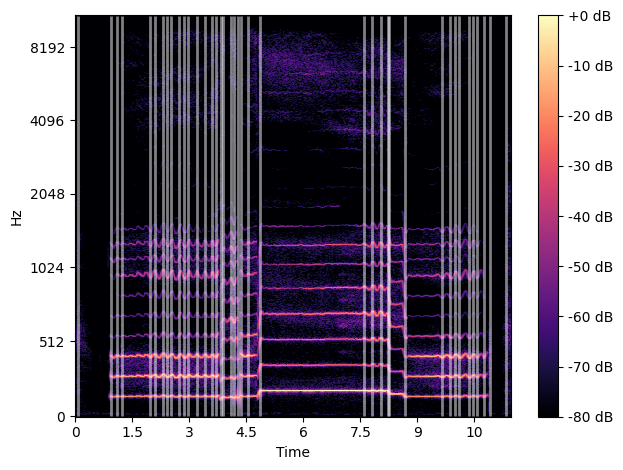

In [ ]:
# estimates onsets with librosa
onsets = librosa.onset.onset_detect(y=y,sr=fs, units='time')

# plot estiamtes
plotTimePoints(D,fs,onsets)